# Multiple linear regression: Relationship between Sales and Social Media, and Radio promotions given categorical variables TV budget, and Influencer type.


## Conclusion: Social Media promotions & Sales

High TV promotional budget has a significant positive influence on sales. The model estimates that switching from a High to Medium TV promo budget has a 95% chance to reduce sales by [-103.913, -93.16] million dollars. Switching from High to Low has a 95% chance to reduce sales by [-207.404	-192.193] million dollars.

This model also estimates that for every $1 million in social media promotional budget, sales are likely to increase by 3.5062 million dollars, with a 95% chance to increase sales between the range of [2.147,	4.866] million dollars. 

There is no statistically significant impact on sales when choosing social media influencers in the Mega, Micro, or Nano categories.

**This model recommends that the business invest a high promotional budget in TV whenever possible, and and invest in social media promotions with any influencer type to increase sales.**

## Conclusion - Radio promotions & Sales

High TV promotional budget has a significant positive influence on sales. The model estimates that switching from a High to Medium TV promo budget has a 95% chance to reduce sales by [-82.736, -68.423] million dollars. Switching from High to Low has a 95% chance to reduce sales by [-164.274, -144.849] million dollars.

This model also estimates that for every $1 million in radio promotional budget, sales are likely to increase by 2.9529 million dollars, with a 95% chance to increase sales between the range of [2.535, 3.370] million dollars. 

There is no statistically significant impact on sales when choosing social media influencers in the Mega, Micro, or Nano categories.

**This model recommends that the business invest a high promotional budget in TV whenever possible, and and invest in radio promotions to increase sales.**

#### Steps
* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Imports

In [1]:
# Import standard libraries for data analysis.
import pandas as pd
import numpy as np
import datetime as dp
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('marketing_sales_data.csv')

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Data exploration

### Data details

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Nano," and "Micro" categories)


In [3]:
df.describe(include = 'all')

,TV,Radio,Social Media,Influencer,Sales
count,572,572.000000,572.000000,572,572.000000
unique,3,NaN,NaN,4,NaN
top,Medium,NaN,NaN,Nano,NaN
freq,205,NaN,NaN,157,NaN
mean,NaN,17.520616,3.333803,NaN,189.296908
std,NaN,9.290933,2.238378,NaN,89.871581
min,NaN,0.109106,0.000031,NaN,33.509810
25%,NaN,10.699556,1.585549,NaN,118.718722
50%,NaN,17.149517,3.150111,NaN,184.005362
75%,NaN,24.606396,4.730408,NaN,264.500118


In [4]:
#count rows and columns
df.shape

(572, 5)

In [5]:
#check for dupes
df.duplicated().value_counts()

False    572
dtype: int64

In [6]:
#check for null values
df.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

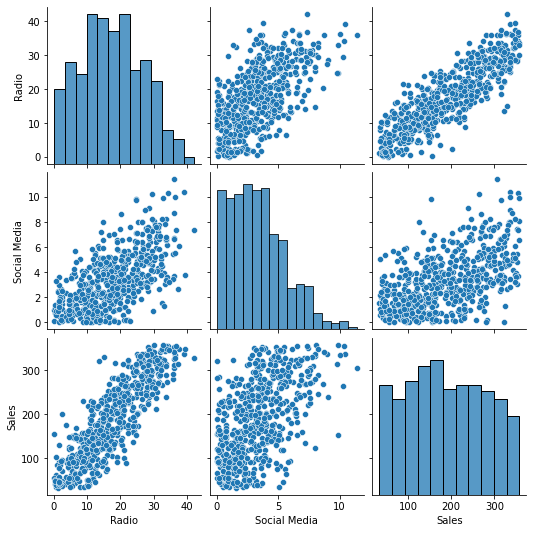

In [7]:
# Create a pairplot of the data.
sns.pairplot(df)

Radio clearly has the best linear relationship to sales, but I'm going to use the social media variable for this model.

### Calculate the mean sales for each categorical variable

In [8]:
# Calculate the mean sales for each TV category. 
mean_tv_sales = df.groupby('TV')['Sales'].mean()
print(mean_tv_sales)

# Calculate the mean sales for each Influencer category. 
mean_influencer_sales = df.groupby('Influencer')['Sales'].mean()
print(mean_influencer_sales)

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64
Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


The influencer categorical variable seems to have little relationship to mean Sales. 
<br>TV categories seem to have a relationship.

### Clean column names

In [9]:
# clean column names to lower case and snake case
df.columns=df.columns.str.lower().str.replace(' ','_')

df.head()

,tv,radio,social_media,influencer,sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [10]:
# Define the OLS formula.
ols_formula = 'sales ~ C(tv) + C(influencer) + social_media'
# Create an OLS model.
OLS = ols(formula = ols_formula, data = df)
# Fit the model.
model = OLS.fit()
# Save the results summary.
model_summary = model.summary()
# Display the model results.
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     671.6
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.28e-253
Time:                        18:39:11   Log-Likelihood:                -2784.8
No. Observations:                 572   AIC:                             5584.
Df Residuals:                     565   BIC:                             5614.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                280.7800      4.840     58.013      0.000     271.273     290.286
C(tv)[T.Low]            -199.7984      3.872    -51.598      0.000    -207.404    -192.193
C(tv)[T.Medium]         -100.0365      3.501    -28.575      0.000    -106.913     -93.160
C(influencer)[T.Mega]      3.9696      3.916      1.014      0.311      -3.723      11.662
C(influencer)[T.Micro]     5.7461      3.815      1.506      0.133      -1.747      13.239
C(influencer)[T.Nano]      1.5354      3.786      0.406      0.685      -5.902       8.972
social_media               3.5062      0.692      5.065      0.000       2.147       4.866
==============================================================================
Omnibus:                      300.284   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.520
Skew:                          -0.002   Prob(JB):                     8.68e-08
Kurtosis:                       1.832   Cond. No.                         21.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions

Linearity
<br> Multivariate Normality
<br> Homoscedasticity
<br> No multicolinearity

### Model assumption: Normality

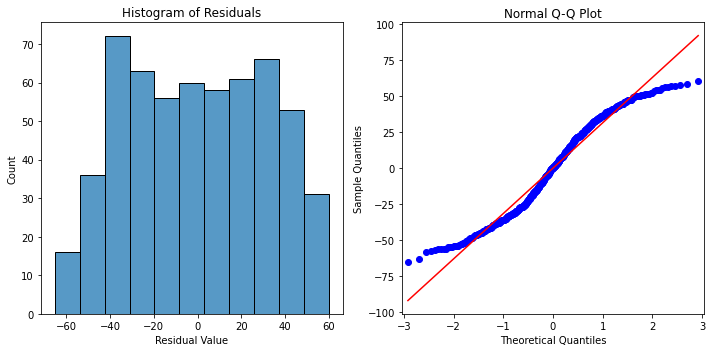

In [11]:
# Calculate the residuals
residuals = model.resid
# Create a 2 figure plot
fig, axes = plt.subplots(1, 2, figsize = (10,5))
# Create a histogram with the residuals. 
sns.histplot(residuals, ax = axes[0])
# Set labels and title
axes[0].set_xlabel('Residual Value')
axes[0].set_title('Histogram of Residuals')

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line = 's', ax = axes[1])
# Set title
axes[1].set_title('Normal Q-Q Plot')
# Use tight_layout
plt.tight_layout()
# Show the plot.
plt.show()

The histogram is close, the QQ-plot is less convincing.

### Check for Homoscedasticity

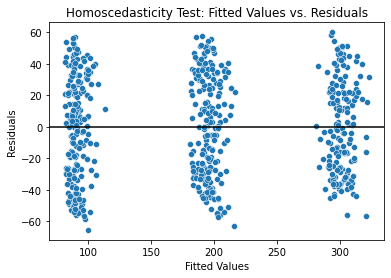

In [12]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
fig.set_title('Homoscedasticity Test: Fitted Values vs. Residuals')
fig.axhline(y = 0, color = 'black')
# Add a line at y = 0 to visualize the variance of residuals above and below 0.

plt.show()

### Check for no multicollinearity

We are only using one continuous independent variable, so there will be no multicolinearity issues. 
<br> We can test for multicolinearity if we used a model with both radio and social_media.

In [13]:
# Calculate the variance inflation factor VIF
x = df[['social_media', 'radio']]
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
df_vif = pd.DataFrame(vif, index = x.columns, columns = ['VIF'])

df_vif

,VIF
social_media,5.170922
radio,5.170922


These variables have high multicolinearity, and show a somewhat linear relationship in our pairplot above.

In [14]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     671.6
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.28e-253
Time:                        18:39:11   Log-Likelihood:                -2784.8
No. Observations:                 572   AIC:                             5584.
Df Residuals:                     565   BIC:                             5614.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                280.7800      4.840     58.013      0.000     271.273     290.286
C(tv)[T.Low]            -199.7984      3.872    -51.598      0.000    -207.404    -192.193
C(tv)[T.Medium]         -100.0365      3.501    -28.575      0.000    -106.913     -93.160
C(influencer)[T.Mega]      3.9696      3.916      1.014      0.311      -3.723      11.662
C(influencer)[T.Micro]     5.7461      3.815      1.506      0.133      -1.747      13.239
C(influencer)[T.Nano]      1.5354      3.786      0.406      0.685      -5.902       8.972
social_media               3.5062      0.692      5.065      0.000       2.147       4.866
==============================================================================
Omnibus:                      300.284   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.520
Skew:                          -0.002   Prob(JB):                     8.68e-08
Kurtosis:                       1.832   Cond. No.                         21.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion - Social Media

High TV promotional budget has a significant positive influence on sales. The model estimates that switching from a High to Medium TV promo budget has a 95% chance to reduce sales by [-103.913, -93.16] million dollars. Switching from High to Low has a 95% chance to reduce sales by [-207.404	-192.193] million dollars.

This model also estimates that for every $1 million in social media promotional budget, sales are likely to increase by 3.5062 million dollars, with a 95% chance to increase sales between the range of [2.147,	4.866] million dollars. 

There is no statistically significant impact on sales when choosing social media influencers in the Mega, Micro, or Nano categories.

**This model recommends that the business invest a high promotional budget in TV whenever possible, and and invest in social media promotions with any influencer type to increase sales.**

$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{social media}*X_{social media}$

In [15]:
## Multilinear Regression Model of Sales, given Radio promotion investment, TV budget size, influencer type,

In [16]:
# Define the OLS formula.
ols_formula_radio = 'sales ~ C(tv) + C(influencer) + radio'
# Create an OLS model.
OLS_radio = ols(formula = ols_formula_radio, data = df)
# Fit the model.
model_radio = OLS_radio.fit()
# Save the results summary.
model_summary_radio = model_radio.summary()
# Display the model results.
model_summary_radio

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     888.6
Date:                Tue, 30 May 2023   Prob (F-statistic):          5.97e-284
Time:                        18:39:12   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5441.
Df Residuals:                     565   BIC:                             5471.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                217.3716      6.558     33.146      0.000     204.491     230.252
C(tv)[T.Low]            -154.5614      4.945    -31.257      0.000    -164.274    -144.849
C(tv)[T.Medium]          -75.5800      3.644    -20.744      0.000     -82.736     -68.423
C(influencer)[T.Mega]      2.4652      3.456      0.713      0.476      -4.323       9.254
C(influencer)[T.Micro]     2.9616      3.373      0.878      0.380      -3.664       9.587
C(influencer)[T.Nano]      0.7880      3.342      0.236      0.814      -5.777       7.353
radio                      2.9529      0.213     13.893      0.000       2.535       3.370
==============================================================================
Omnibus:                       58.922   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.832
Skew:                           0.057   Prob(JB):                     0.000134
Kurtosis:                       2.143   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

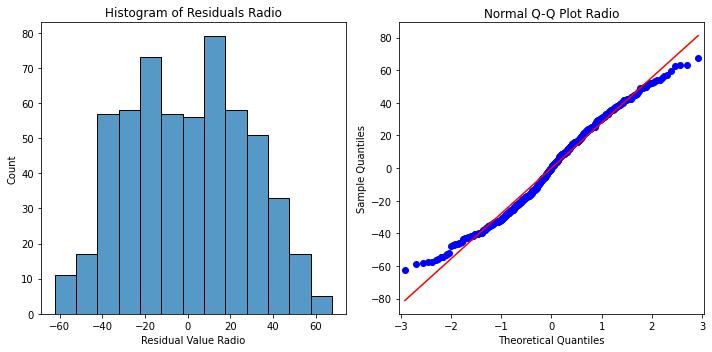

In [17]:
# Calculate the residuals
residuals_radio = model_radio.resid
# Create a 2 figure plot
fig, axes = plt.subplots(1, 2, figsize = (10,5))
# Create a histogram with the residuals. 
sns.histplot(residuals_radio, ax = axes[0])
# Set labels and title
axes[0].set_xlabel('Residual Value Radio')
axes[0].set_title('Histogram of Residuals Radio')

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals_radio, line = 's', ax = axes[1])
# Set title
axes[1].set_title('Normal Q-Q Plot Radio')
# Use tight_layout
plt.tight_layout()
# Show the plot.
plt.show()

The radio model looks more normally distributed than the social media model.

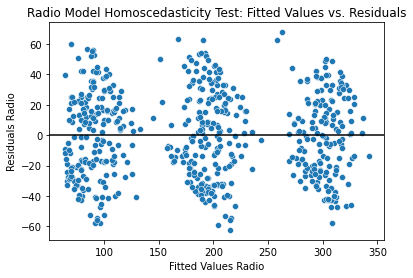

In [18]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model_radio.fittedvalues, y = model_radio.resid)
fig.set_xlabel('Fitted Values Radio')
fig.set_ylabel('Residuals Radio')
fig.set_title('Radio Model Homoscedasticity Test: Fitted Values vs. Residuals')
fig.axhline(y = 0, color = 'black')
# Add a line at y = 0 to visualize the variance of residuals above and below 0.

plt.show()

## Conclusion - Radio

High TV promotional budget has a significant positive influence on sales. The model estimates that switching from a High to Medium TV promo budget has a 95% chance to reduce sales by [-82.736, -68.423] million dollars. Switching from High to Low has a 95% chance to reduce sales by [-164.274, -144.849] million dollars.

This model also estimates that for every $1 million in radio promotional budget, sales are likely to increase by 2.9529 million dollars, with a 95% chance to increase sales between the range of [2.535, 3.370] million dollars. 

There is no statistically significant impact on sales when choosing social media influencers in the Mega, Micro, or Nano categories.

**This model recommends that the business invest a high promotional budget in TV whenever possible, and and invest in radio promotions with any influencer type to increase sales.**

#### **Data Source**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).